In [1]:
import pandas as pd
from utils.visualization import density_plots

data = pd.read_pickle('results/all.pkl')
combined_reals = data['reals_list']
combined_preds = data['predictions_list']
combined_molregnos = data['molregnos_list']

combined_titles = []
models_to_evaluate = ['XGBoost', 'PLS', 'Lasso', 'RandomForest', 'kNN', 'NeuralNetwork', 'MultilinearRegression']
descriptors_to_use = ['padel','liang_descriptors', 'RDKit_PhysChem', 'MDFP', 'MACCS', 'ECFP4', 'codessa']

for descriptor in descriptors_to_use:
    for model_name in models_to_evaluate:
        combined_titles.append(f"{model_name} ({descriptor})")

density_plots(reals_list=combined_reals, predictions_list=combined_preds, molregnos_list=combined_molregnos,
                print_stats=True, bounds=None, title=combined_titles,
                name="all_models_descriptors1", dims=(len(descriptors_to_use), len(models_to_evaluate)), thresholds=1)


/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/

/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/

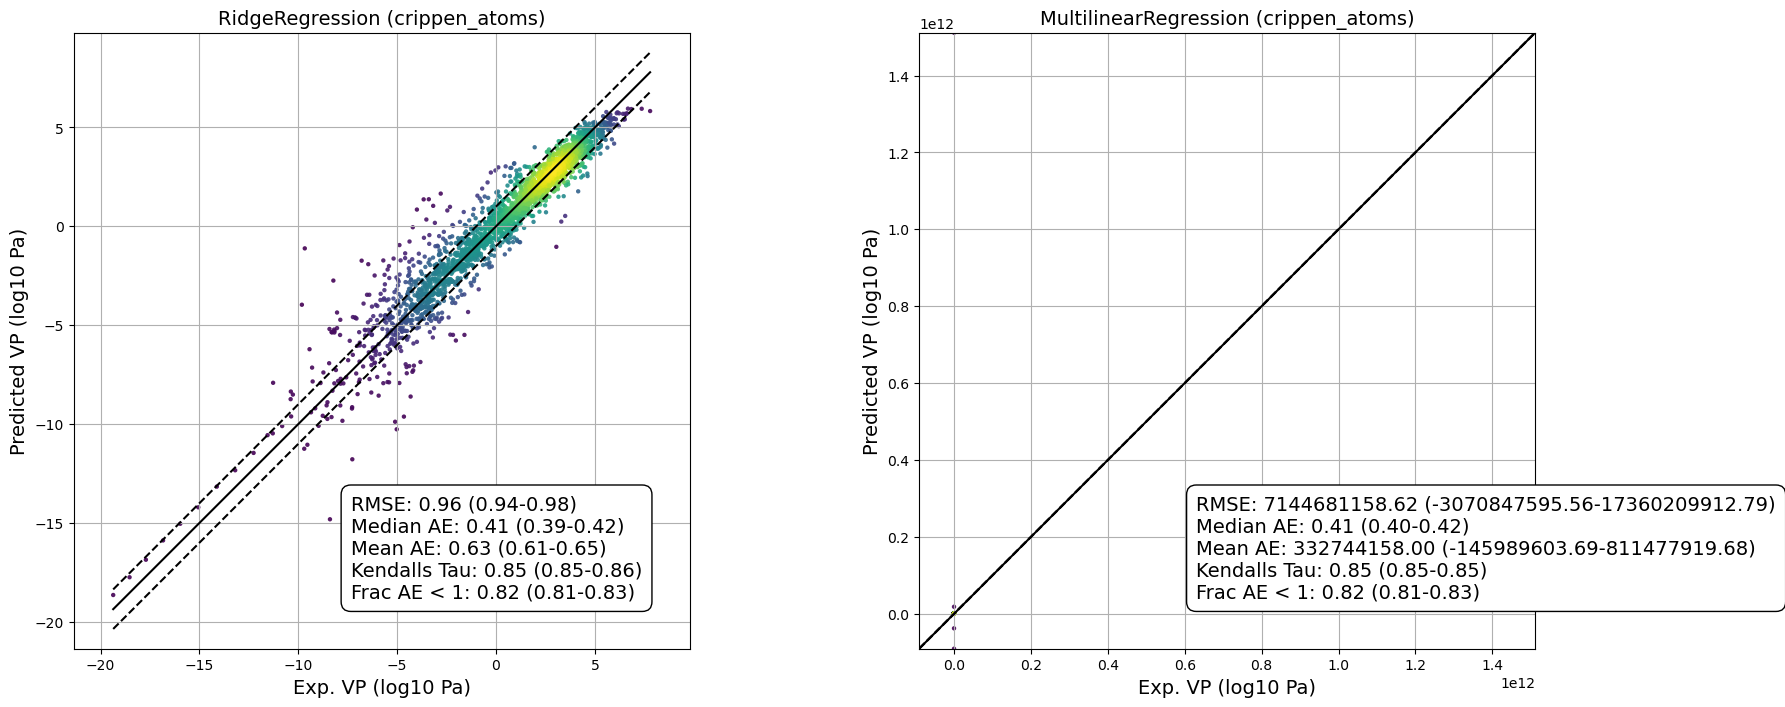

In [3]:
import pandas as pd
from utils.visualization import density_plots

data = pd.read_pickle('results/crippen_atoms.pkl')
combined_reals = data['reals_list']
combined_preds = data['predictions_list']
combined_molregnos = data['molregnos_list']

combined_titles = []
models_to_evaluate =['RidgeRegression','MultilinearRegression']
descriptors_to_use = ['crippen_atoms',]

for descriptor in descriptors_to_use:
    for model_name in models_to_evaluate:
        combined_titles.append(f"{model_name} ({descriptor})")

density_plots(reals_list=combined_reals, predictions_list=combined_preds, molregnos_list=combined_molregnos,
                print_stats=True, bounds=None, title=combined_titles,
                name="all_models_descriptors1", dims=(len(descriptors_to_use), len(models_to_evaluate)), thresholds=1)


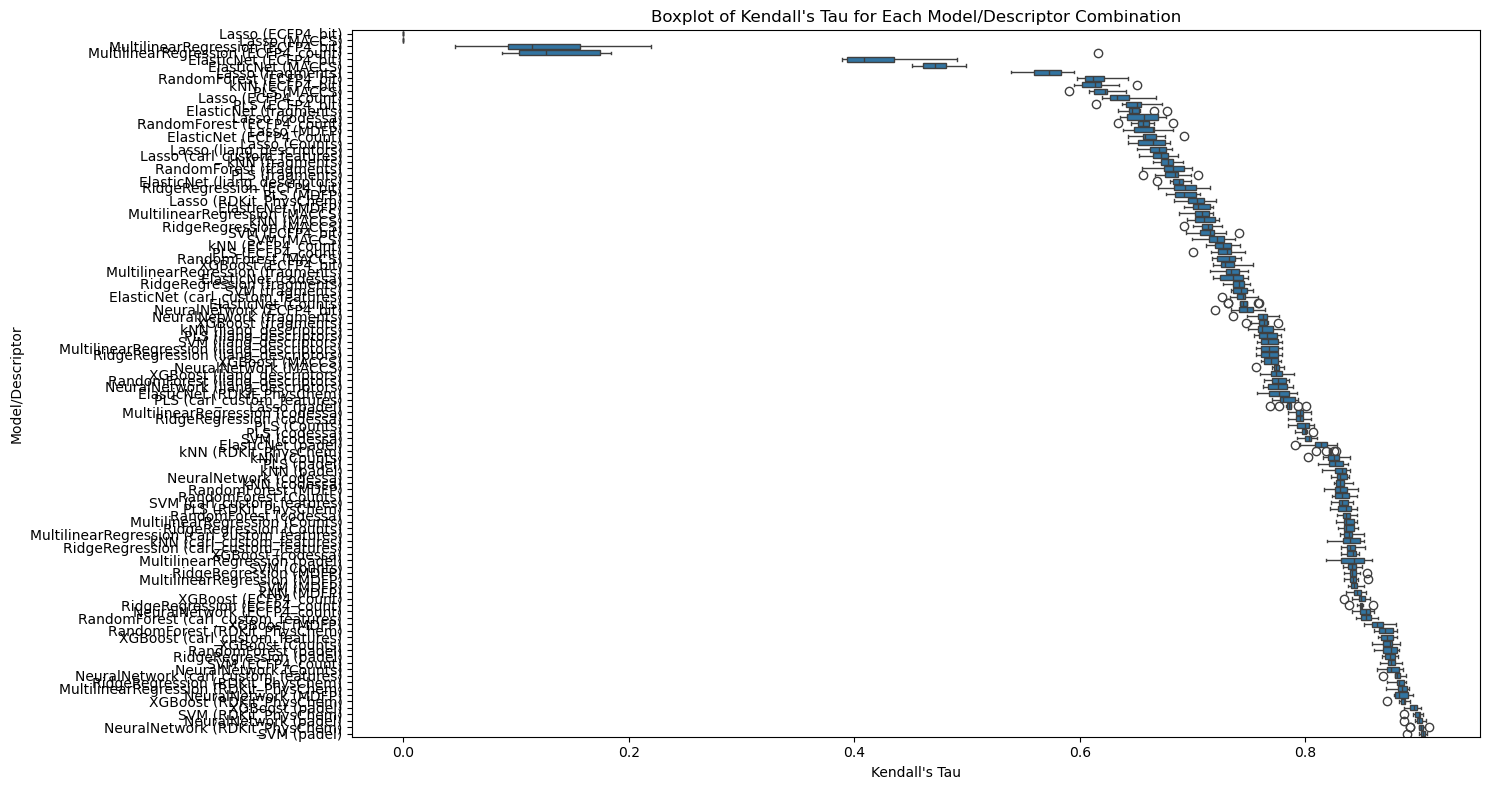

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Load the saved data
data = pd.read_pickle('results/fragments_and_counts.pkl')

# Extract the relevant data
reals_list = data['reals_list']
predictions_list = data['predictions_list']
combined_titles = data['combined_titles']

# Calculate Kendall's tau for each combination
kendall_taus = []

for real, pred, title in zip(reals_list, predictions_list, combined_titles):
    taus = []
    for real_vals, pred_vals in zip(real, pred):
        tau, _ = stats.kendalltau(real_vals, pred_vals)
        taus.append(tau)
    kendall_taus.append(taus)

# Create a DataFrame for boxplot
df_kendall = pd.DataFrame(kendall_taus).T
df_kendall.columns = combined_titles
df_kendall.fillna(0, inplace=True)


# Melt the DataFrame for seaborn boxplot
df_kendall_melted = df_kendall.melt(var_name='Model/Descriptor', value_name="Kendall's Tau")

# Sort by ascending mean value
mean_taus = df_kendall.mean().sort_values()
sorted_titles = mean_taus.index

# Plot the boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_kendall_melted, x='Kendall\'s Tau', y='Model/Descriptor', order=sorted_titles)
plt.title('Boxplot of Kendall\'s Tau for Each Model/Descriptor Combination')
plt.xlabel('Kendall\'s Tau')
plt.ylabel('Model/Descriptor')
plt.tight_layout()
plt.show()


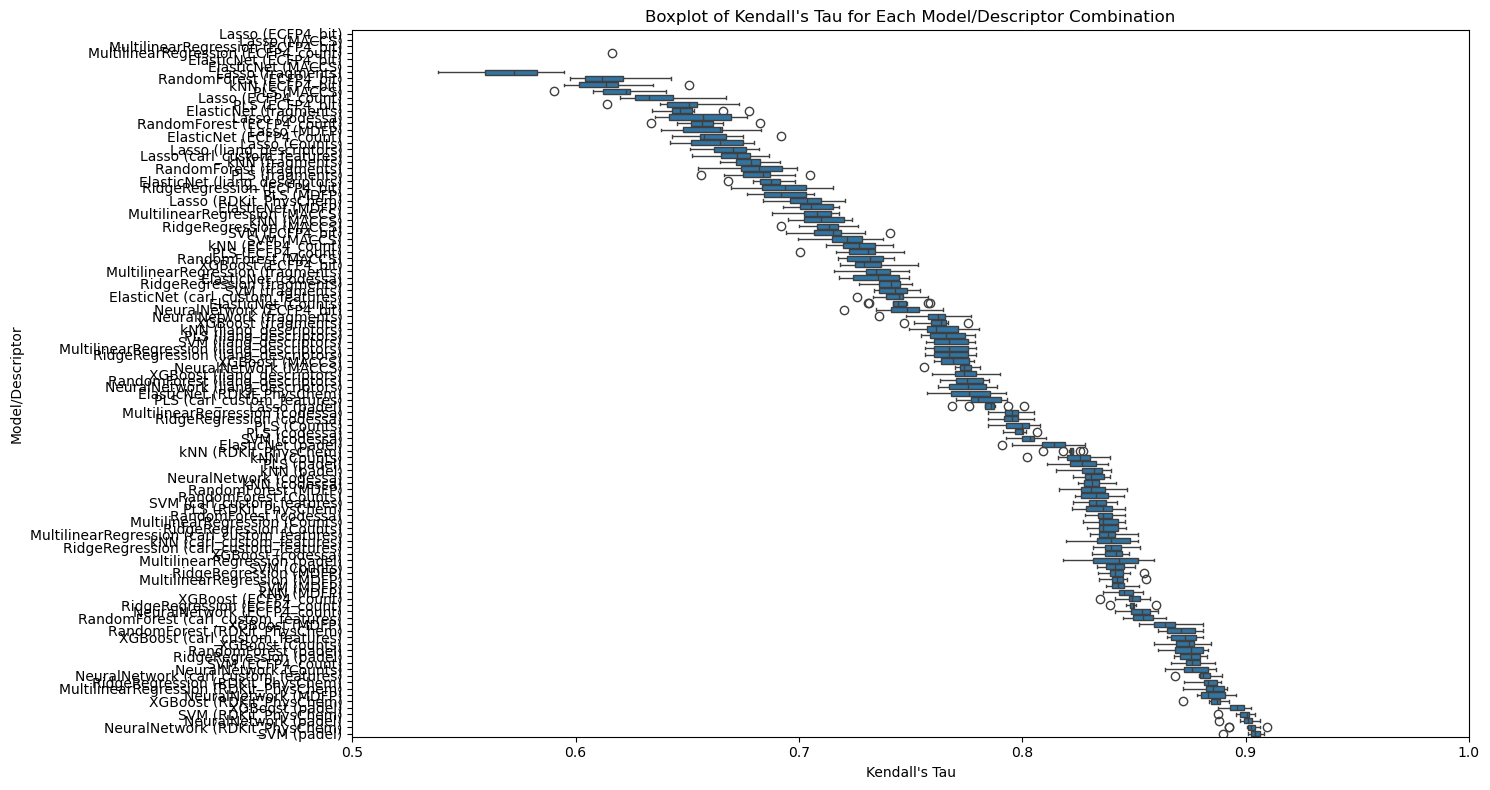

In [3]:
#also do a zoom, starting from 0.5
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_kendall_melted, x='Kendall\'s Tau', y='Model/Descriptor', order=sorted_titles)
plt.title('Boxplot of Kendall\'s Tau for Each Model/Descriptor Combination')
plt.xlabel('Kendall\'s Tau')
plt.ylabel('Model/Descriptor')
plt.xlim(0.5, 1)
plt.tight_layout()
plt.show()


In [4]:
data.keys()

dict_keys(['reals_list', 'predictions_list', 'molregnos_list'])

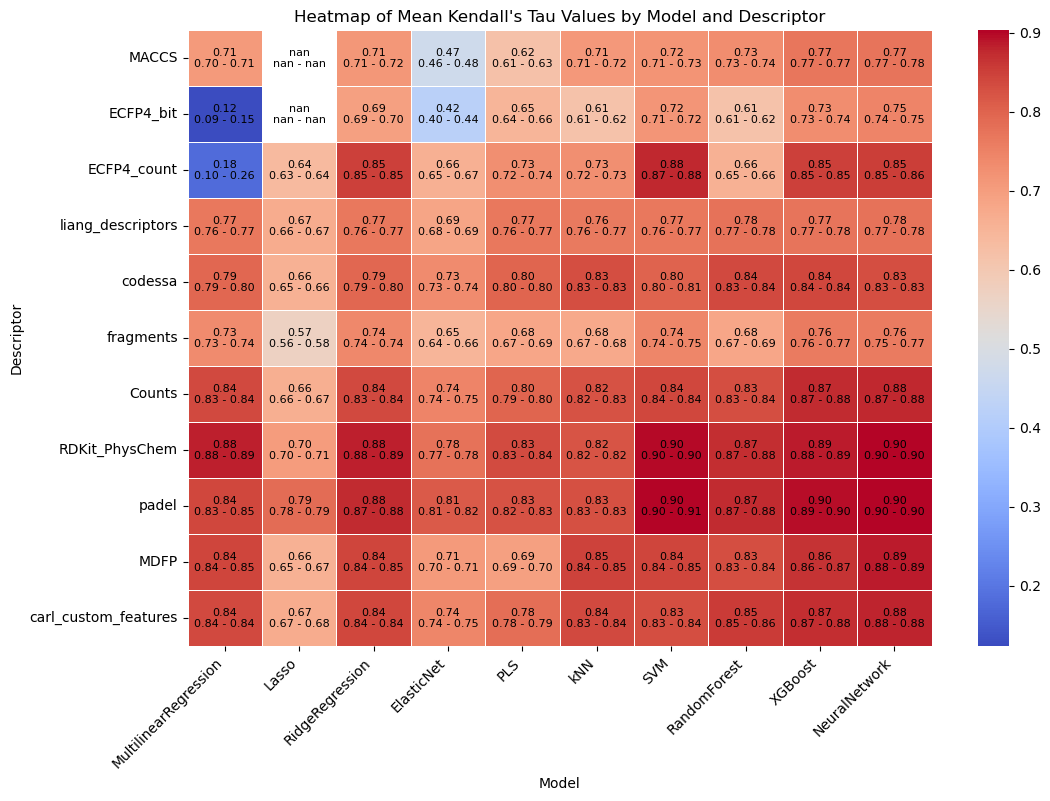

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_pickle('results/fragments_and_counts.pkl')

# Extract the relevant data
reals_list = data['reals_list']
predictions_list = data['predictions_list']
combined_titles = data['combined_titles']

# Calculate Kendall's tau for each combination
kendall_taus = []

for real, pred, title in zip(reals_list, predictions_list, combined_titles):
    taus = []
    for real_vals, pred_vals in zip(real, pred):
        tau, _ = stats.kendalltau(real_vals, pred_vals)
        taus.append(tau)
    kendall_taus.append(taus)

# Convert to DataFrame
df_kendall = pd.DataFrame(kendall_taus).T
df_kendall.columns = combined_titles

original_columns = df_kendall.columns

# Initialize lists to hold the data for the new DataFrame
models = []
descriptors = []
kendall_taus = []

# Loop through each column and split into model, descriptor, and append the data
for col in original_columns:
    model, descriptor = col.split(' (')
    descriptor = descriptor.rstrip(')')
    models.extend([model] * len(df_kendall))
    descriptors.extend([descriptor] * len(df_kendall))
    kendall_taus.extend(df_kendall[col].values)

# Create a new DataFrame with the three columns
new_df = pd.DataFrame({
    'Model': models,
    'Descriptor': descriptors,
    'KendallTau': kendall_taus
})

# Display the new DataFrame
new_df
    # models_to_evaluate = ['XGBoost', 'PLS', 'Lasso', 'RandomForest', 'kNN', 'NeuralNetwork', 'MultilinearRegression', 'SVM', 'ElasticNet', 'RidgeRegression']
    # descriptors_to_use = ['padel', 'liang_descriptors', 'RDKit_PhysChem', 'MDFP', 'MACCS', 'ECFP4_bit', 'codessa', 'ECFP4_count']
# Define the order of models and descriptors by complexity
# model_order = ['MultilinearRegression', 'Lasso', 'PLS', 'kNN', 'RandomForest', 'XGBoost', 'NeuralNetwork']
    # models_to_evaluate = ['XGBoost', 'PLS', 'Lasso', 'RandomForest', 'kNN', 'NeuralNetwork', 'MultilinearRegression', 'SVM', 'ElasticNet', 'RidgeRegression']
model_order = ['MultilinearRegression', 'Lasso', 'RidgeRegression', 'ElasticNet', 'PLS', 'kNN', 'SVM','RandomForest', 'XGBoost', 'NeuralNetwork']
descriptor_order = ['MACCS', 'ECFP4_bit','ECFP4_count', 'liang_descriptors', 'codessa', 'fragments','Counts','RDKit_PhysChem', 'padel', 'MDFP','carl_custom_features']
grouped_df = new_df.groupby(['Model', 'Descriptor']).agg(
    KendallTau_mean=('KendallTau', 'mean'),
    KendallTau_std=('KendallTau', 'std'),
    KendallTau_count=('KendallTau', 'count')
).reset_index()

# Convert the 'Model' and 'Descriptor' columns to categorical types with the defined order
grouped_df['Model'] = pd.Categorical(grouped_df['Model'], categories=model_order, ordered=True)
grouped_df['Descriptor'] = pd.Categorical(grouped_df['Descriptor'], categories=descriptor_order, ordered=True)

# Re-sort the DataFrame based on the new categorical order
grouped_df = grouped_df.sort_values(['Descriptor', 'Model'])
# Calculate the 90% confidence interval
grouped_df['KendallTau_CI'] = grouped_df.apply(
    lambda row: stats.norm.interval(0.90, loc=row['KendallTau_mean'], scale=row['KendallTau_std']/np.sqrt(row['KendallTau_count'])),
    axis=1
)

# Pivot the DataFrame again after sorting
heatmap_data = grouped_df.pivot(index="Descriptor", columns="Model", values="KendallTau_mean")

# Re-create the heatmap with sorted models and descriptors
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=False, cmap="coolwarm", fmt=".2f", linewidths=.5, cbar=True)

plt.title("Heatmap of Mean Kendall's Tau Values by Model and Descriptor")
plt.xlabel("Model")
plt.ylabel("Descriptor")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add text boxes with the 90% CI
for i in range(heatmap_data.shape[0]):
    for j in range(heatmap_data.shape[1]):
        mean_val = heatmap_data.iloc[i, j]
        ci = grouped_df[(grouped_df['Descriptor'] == heatmap_data.index[i]) & 
                        (grouped_df['Model'] == heatmap_data.columns[j])]['KendallTau_CI'].values[0]
        ci_text = f"{ci[0]:.2f} - {ci[1]:.2f}"
        plt.text(j + 0.5, i + 0.5, f"{mean_val:.2f}\n{ci_text}",
                 ha='center', va='center', color='black', fontsize=8)

plt.show()


/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/

Length of combined_titles: 49
Shape of df_stat: (10, 49)


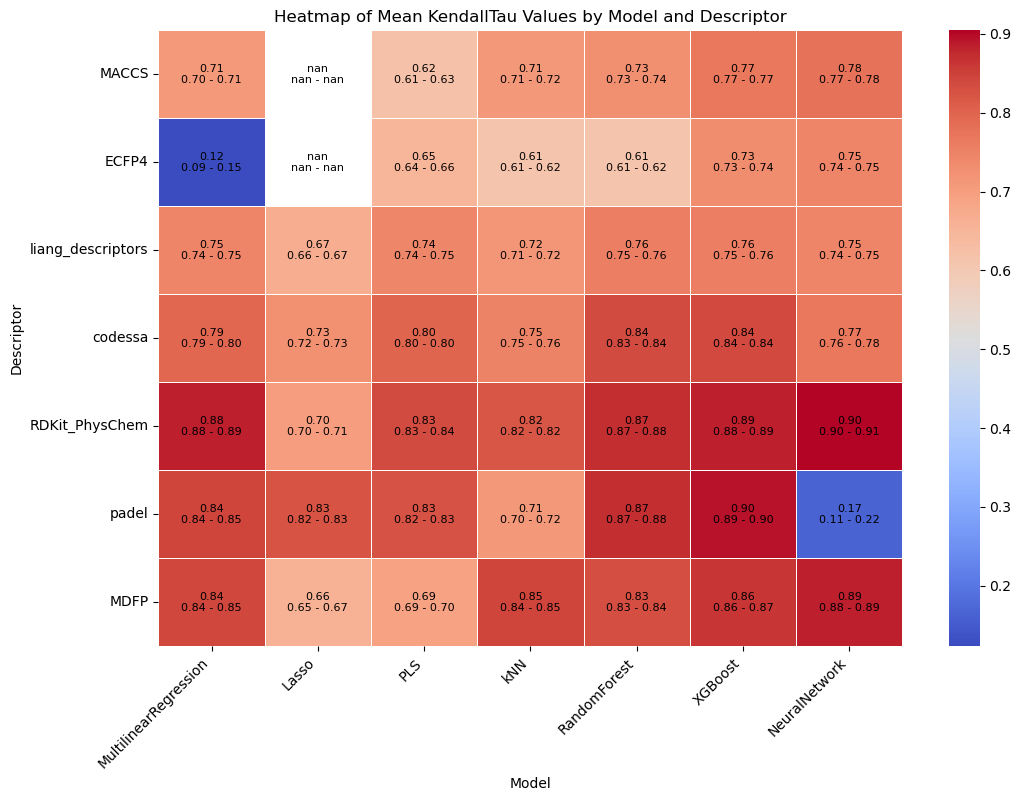

In [2]:
# Example usage
from utils.visualization import compute_and_plot_statistic
model_order = ['MultilinearRegression', 'Lasso', 'PLS', 'kNN', 'RandomForest', 'XGBoost', 'NeuralNetwork']
descriptor_order = ['MACCS', 'ECFP4', 'liang_descriptors', 'codessa', 'RDKit_PhysChem', 'padel', 'MDFP']

# Example usage
model_order = ['MultilinearRegression', 'Lasso', 'PLS', 'kNN', 'RandomForest', 'XGBoost', 'NeuralNetwork']
descriptor_order = ['MACCS', 'ECFP4', 'liang_descriptors', 'codessa', 'RDKit_PhysChem', 'padel', 'MDFP']

compute_and_plot_statistic(
    data_path='results/all.pkl',
    statistic_name="KendallTau",
    thresholds=1,  # Adjust as needed
    model_order=model_order,
    descriptor_order=descriptor_order
)

/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/

Length of combined_titles: 49
Shape of df_stat: (10, 49)


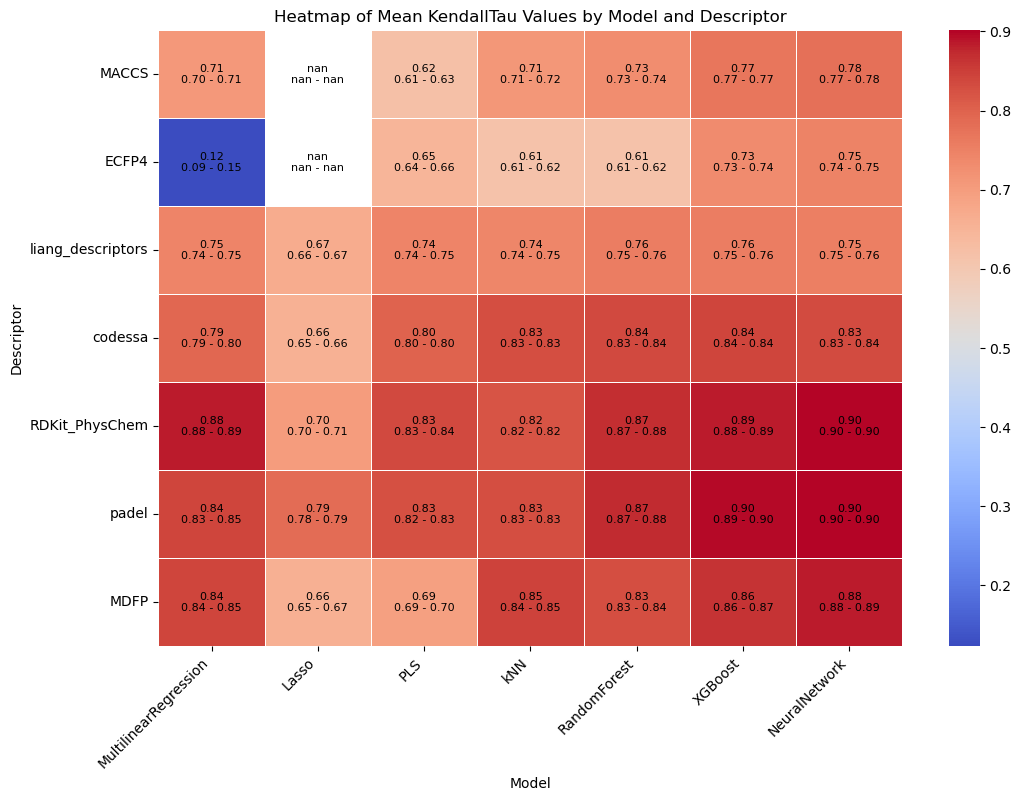

In [5]:
# Example usage
from utils.visualization import compute_and_plot_statistic
model_order = ['MultilinearRegression', 'Lasso', 'PLS', 'kNN', 'RandomForest', 'XGBoost', 'NeuralNetwork']
descriptor_order = ['MACCS', 'ECFP4', 'liang_descriptors', 'codessa', 'RDKit_PhysChem', 'padel', 'MDFP']

# Example usage
model_order = ['MultilinearRegression', 'Lasso', 'PLS', 'kNN', 'RandomForest', 'XGBoost', 'NeuralNetwork']
descriptor_order = ['MACCS', 'ECFP4', 'liang_descriptors', 'codessa', 'RDKit_PhysChem', 'padel', 'MDFP']

compute_and_plot_statistic(
    data_path='results/all.pkl',
    statistic_name="KendallTau",
    thresholds=1,  # Adjust as needed
    model_order=model_order,
    descriptor_order=descriptor_order
)

/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/

Length of combined_titles: 49
Shape of df_stat: (10, 49)


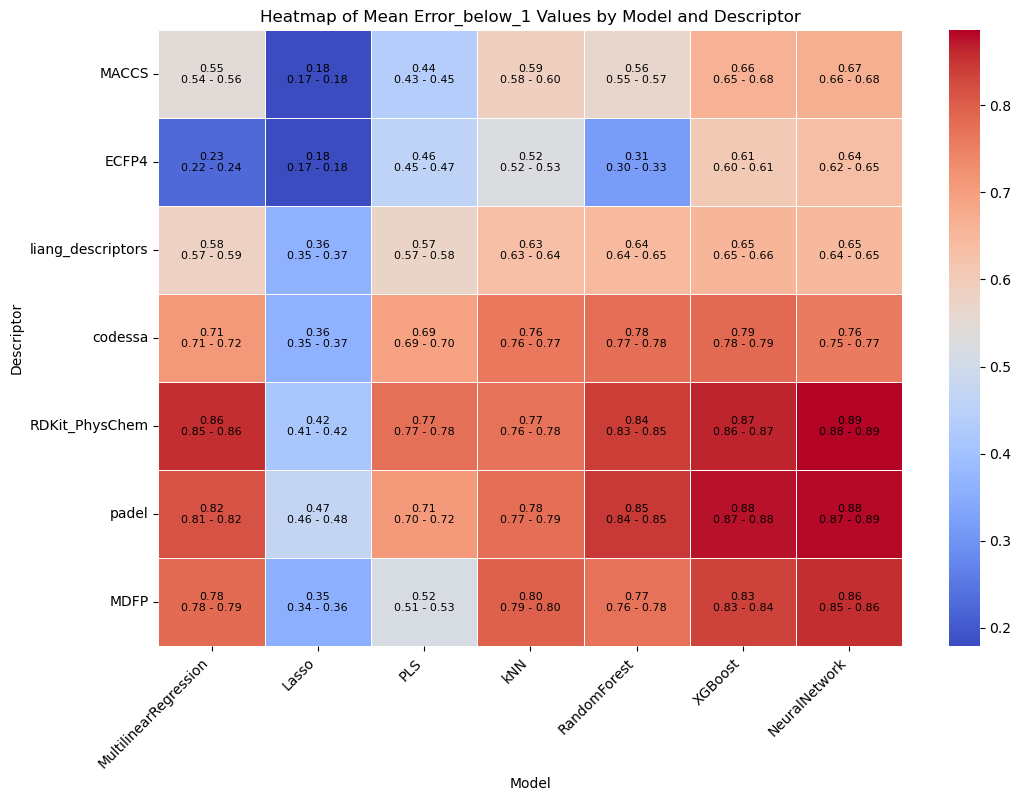

In [6]:
compute_and_plot_statistic(
    data_path='results/all.pkl',
    statistic_name="Error_below_1",
    thresholds=1,  # Adjust as needed
    model_order=model_order,
    descriptor_order=descriptor_order
)

/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/

Length of combined_titles: 49
Shape of df_stat: (10, 49)


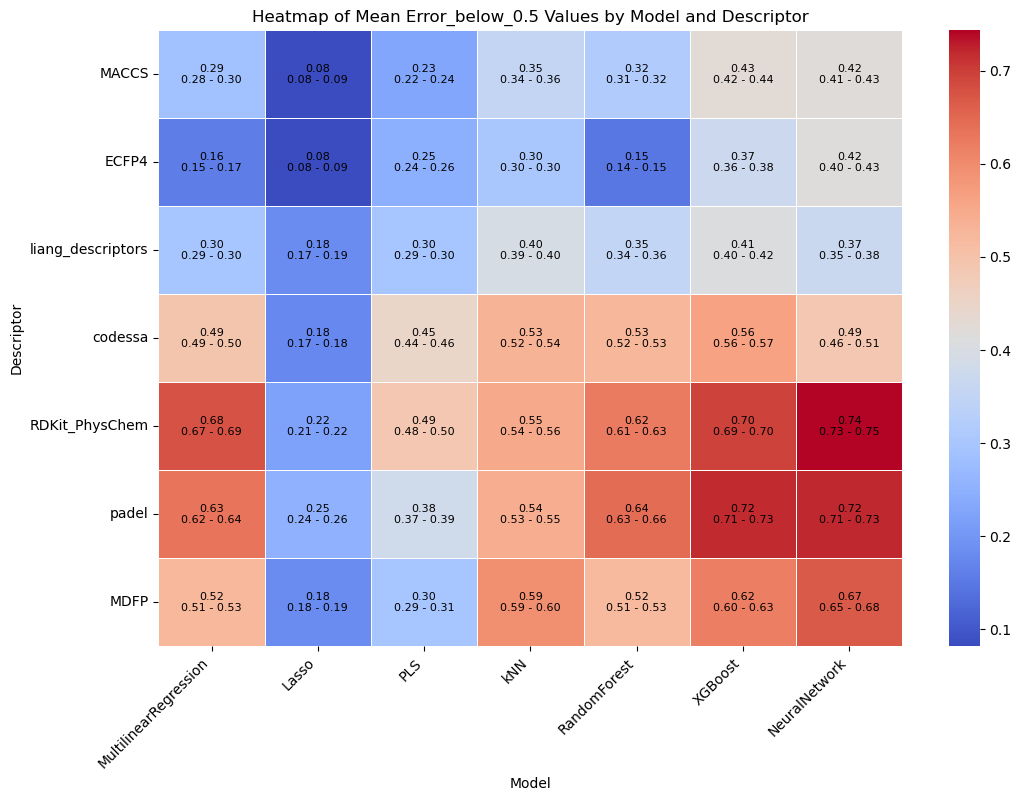

In [7]:
compute_and_plot_statistic(
    data_path='results/all.pkl',
    statistic_name="Error_below_0.5",
    thresholds=0.5,  # Adjust as needed
    model_order=model_order,
    descriptor_order=descriptor_order
)

/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/localhome/cschiebroek/.conda/envs/molecular-descriptors/lib/python3.9/site-packages/

Length of combined_titles: 49
Shape of df_stat: (10, 49)


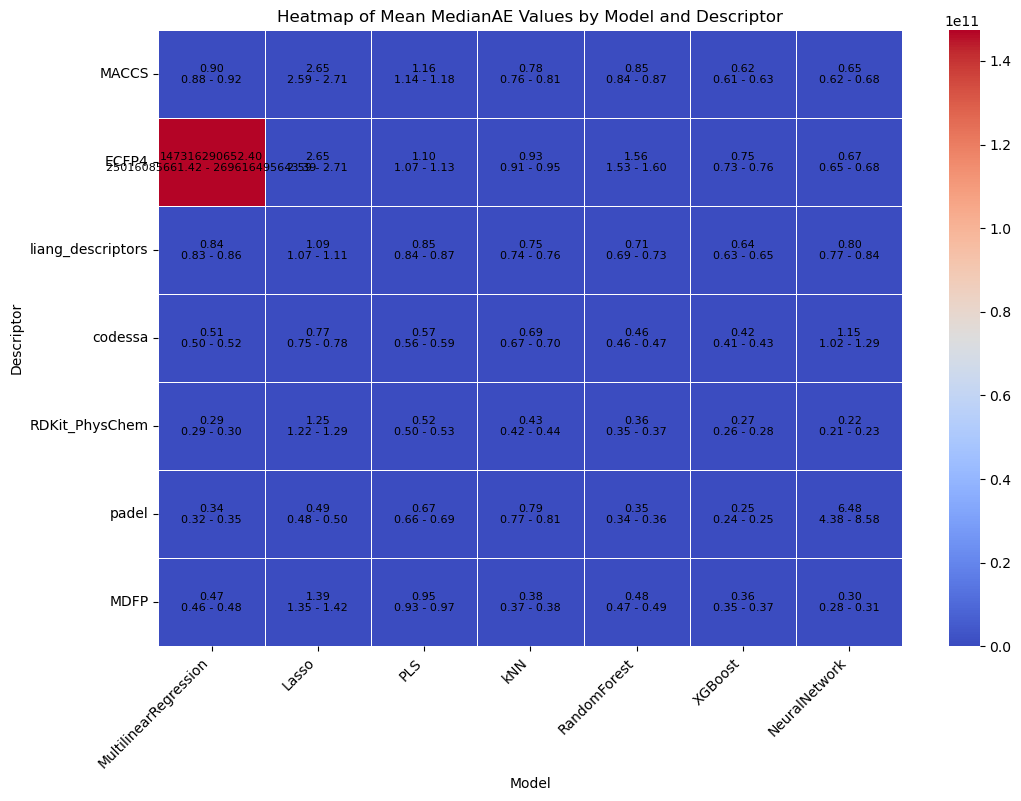

In [7]:
compute_and_plot_statistic(
    data_path='results/all.pkl',
    statistic_name="MedianAE",
    thresholds=1,  # Adjust as needed
    model_order=model_order,
    descriptor_order=descriptor_order
)

In [4]:
from rdkit import Chem